In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
claim= pd.read_csv('E:/DataSetProject5/claims.csv')
cust_dem= pd.read_csv('E:/DataSetProject5/cust_demographics.csv')

In [4]:
claim.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [5]:
claim.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [6]:
cust_dem.isnull().sum()

CUST_ID        0
gender         0
DateOfBirth    0
State          0
Contact        0
Segment        0
dtype: int64

In [7]:
cust_dem

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


##### Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data.

In [8]:
cust_claim = pd.merge(left = cust_dem , right = claim ,left_on ='CUST_ID' , right_on='customer_id',how = 'left')
cust_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1088,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1089,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1090,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


In [9]:
cust_claim['claim_amount']= cust_claim['claim_amount'].str.replace('$','')
cust_claim.head(2)

C:\Users\HP\AppData\Local\Temp/ipykernel_13384/4109953015.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_claim['claim_amount']= cust_claim['claim_amount'].str.replace('$','')


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980,3.0,No


### Perform a data audit for the datatypes

In [10]:
cust_claim.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id               float64
customer_id            float64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [11]:
cust_claim['claim_date'] = pd.to_datetime(cust_claim['claim_date'])
cust_claim['DateOfBirth'] = pd.to_datetime(cust_claim['DateOfBirth'])
cust_claim['DateOfBirth'] = np.where(cust_claim['DateOfBirth'].dt.year>2021 , cust_claim['DateOfBirth'] +pd.DateOffset(years=-100),cust_claim['DateOfBirth'])

#### Convert the column claim_amount to numeric

In [12]:
cust_claim['claim_amount']=cust_claim['claim_amount'].astype('float')
cust_claim.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                      float64
customer_id                   float64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
dtype: object

###### Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims

In [13]:
cust_claim["flag"] =np.where(cust_claim.police_report=='No',0, np.where(cust_claim.police_report=='Yes',1,'nan'))
cust_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,nan
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,1
1088,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0
1089,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1
1090,11256802,Female,1964-10-22,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0


###### One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customerID should remain unique. 

In [14]:
cust_claim = cust_claim.drop_duplicates(['CUST_ID'])
cust_claim.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,nan


In [15]:
cust_claim.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'flag'],
      dtype='object')

#### Check for missing values and impute the missing values with an appropriate value.

In [16]:
categorical_col = ['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment', 'claim_id', 'customer_id', 'incident_cause','claim_date','claim_area','police_report', 'claim_type', 'total_policy_claims','fraudulent']
continous_col = ['claim_amount']

In [17]:
cust_claim[categorical_col] = cust_claim[categorical_col].fillna(cust_claim[categorical_col].mode().iloc[0], axis=0)
cust_claim[continous_col] = cust_claim[continous_col].fillna(cust_claim[continous_col].mean())


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
cust_claim.isnull().sum()

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
flag                   0
dtype: int64

##### Calculate the age of customers in years.

In [19]:
cust_claim.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,nan


In [20]:
cust_claim['age'] = (pd.Timestamp.now()-cust_claim['DateOfBirth']).astype('<m8[Y]')
cust_claim.head(2)


C:\Users\HP\AppData\Local\Temp/ipykernel_13384/1212652535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claim['age'] = (pd.Timestamp.now()-cust_claim['DateOfBirth']).astype('<m8[Y]')


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,43.0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,nan,52.0


In [21]:
cust_claim['age_cat'] = np.where(cust_claim.age<18 , 'children', np.where((cust_claim.age>18 )&(cust_claim.age<30 ),'youth', np.where((cust_claim.age>30 )&(cust_claim.age<60),'adult','senior')))
cust_claim.head(2)

C:\Users\HP\AppData\Local\Temp/ipykernel_13384/1708404856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claim['age_cat'] = np.where(cust_claim.age<18 , 'children', np.where((cust_claim.age>18 )&(cust_claim.age<30 ),'youth', np.where((cust_claim.age>30 )&(cust_claim.age<60),'adult','senior')))


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,age_cat
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,43.0,adult
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,nan,52.0,adult


##### What is the average amount claimed by the customers from various segments?


In [22]:
cust_claim.loc[:,['Segment','claim_amount']].groupby('Segment').claim_amount.mean().reset_index()

,Segment,claim_amount
0,Gold,12755.710930
1,Platinum,12370.138663
2,Silver,12271.163192


###### What is the total claim amount based on incident cause for all the claimsthat have been done at least 20 days prior to 1st of October, 2018.


In [23]:
cust_claim.loc[cust_claim.claim_date<'2018-09-10'].groupby('incident_cause')['claim_amount'].sum().reset_index()

,incident_cause,claim_amount
0,Crime,7.244625e+05
1,Driver error,3.264286e+06
2,Natural causes,1.312706e+06
3,Other causes,3.812332e+06
4,Other driver error,3.318806e+06


#### How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [24]:
cust_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,age_cat
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,43.0,adult
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,nan,52.0,adult
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0,38.0,adult
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0,36.0,adult
6,19269962,Male,1977-05-13,NV,956-871-8691,Gold,22890252.0,19269962.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,0,44.0,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,1,41.0,adult
1088,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0,25.0,youth
1089,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1,32.0,adult
1090,11256802,Female,1964-10-22,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0,57.0,adult


In [25]:
cust_claim.loc[((cust_claim.State=='TX') | (cust_claim.State=='DE') |(cust_claim.State=='AK')) & (cust_claim.incident_cause.isin(['Driver error','Other driver error'])) & (cust_claim.age_cat == 'adult')].groupby('State')[['State']].count()
               


,State
State,
AK,8
DE,10
TX,9


##### Draw a pie chart between the aggregated value of claim amount based on gender and segment.

In [26]:
seg_gender = pd.pivot_table(data =cust_claim , values = 'claim_amount', index='Segment' , columns = 'gender')
seg_gender

gender,Female,Male
Segment,,
Gold,12338.569681,13114.452404
Platinum,12278.216434,12475.038148
Silver,11662.469737,12823.311354


array([<AxesSubplot:ylabel='Female'>, <AxesSubplot:ylabel='Male'>],
      dtype=object)

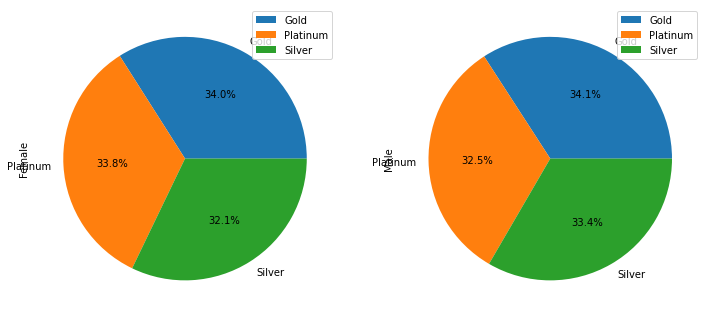

In [66]:
seg_gender.plot(kind='pie', subplots=True , figsize=(12,10),autopct = '%1.1f%%')

##### Among males and females, which gender had claimed the most for any type of driver related issues?

In [28]:
gender_driver = cust_claim.loc[cust_claim.incident_cause.isin(['Driver error','Other driver error']),:].groupby('gender')['gender'].count()
gender_driver

gender
Female    221
Male      280
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender'>

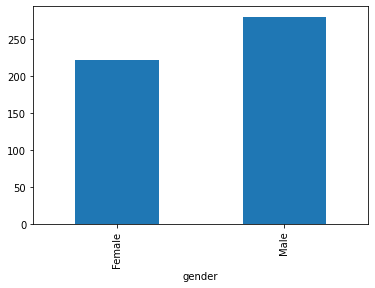

In [29]:
gender_driver.plot(kind = 'bar', y='count' )

#### Which age group had the maximum fraudulent policy claims?

<AxesSubplot:xlabel='age_cat'>

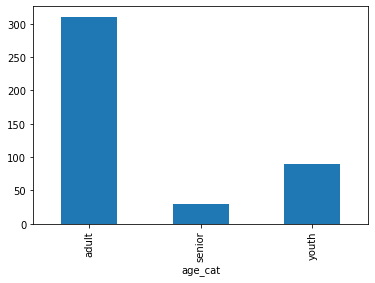

In [30]:
fraud_group = cust_claim.loc[cust_claim.fraudulent=='Yes',['age_cat','fraudulent','total_policy_claims']].groupby(['age_cat']).total_policy_claims.sum()
fraud_group.plot(kind='bar')

#### Visualize the monthly trend of the total amount that has been claimed by the customers.

In [31]:
cust_claim['month'] = cust_claim.claim_date.apply(lambda x: pd.Timestamp.strftime(x, format='%B'))
cust_claim.head(2)

C:\Users\HP\AppData\Local\Temp/ipykernel_13384/2732014565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claim['month'] = cust_claim.claim_date.apply(lambda x: pd.Timestamp.strftime(x, format='%B'))


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,age_cat,month
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,43.0,adult,November
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,nan,52.0,adult,October


In [64]:
month_amount = cust_claim.pivot_table(index=(cust_claim.claim_date.dt.month),values= 'claim_amount',aggfunc=sum).reset_index()
month_amount

,claim_date,claim_amount
0,1,1.419305e+06
1,2,1.133107e+06
2,3,1.320094e+06
3,4,1.276071e+06
4,5,1.114211e+06
5,6,1.276333e+06
6,7,1.379035e+06
7,8,9.112035e+05
8,9,9.806480e+05
9,10,1.422655e+06


<AxesSubplot:xlabel='claim_date', ylabel='claim_amount'>

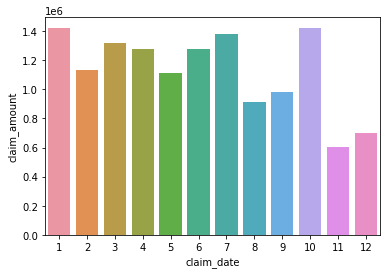

In [65]:
sns.barplot(data= month_amount, x = 'claim_date' , y = 'claim_amount')

In [37]:
#What is the average claim amount for gender and age categories and 
#suitably represent the above using a facetted bar chart, one facet that 
#represents fraudulent claims and the other for non-fraudulent claims.

In [38]:
yfraud=cust_claim[cust_claim['fraudulent']=='Yes']
nfraud=cust_claim[cust_claim['fraudulent']=='Yes']

In [39]:
group_yfraud = yfraud.groupby(['gender','age_cat'])['claim_amount'].sum().reset_index()
group_yfraud

,gender,age_cat,claim_amount
0,Female,adult,1.156984e+06
1,Female,senior,4.349300e+04
2,Female,youth,1.946785e+05
3,Male,adult,1.429173e+06
4,Male,senior,1.619085e+05
5,Male,youth,2.310555e+05


In [40]:
group_nfraud = yfraud.groupby(['gender','age_cat'])['claim_amount'].sum().reset_index()
group_nfraud

,gender,age_cat,claim_amount
0,Female,adult,1.156984e+06
1,Female,senior,4.349300e+04
2,Female,youth,1.946785e+05
3,Male,adult,1.429173e+06
4,Male,senior,1.619085e+05
5,Male,youth,2.310555e+05


In [41]:
aq =pd.pivot_table(group_yfraud,values = 'claim_amount',index='gender',columns = 'age_cat')
aq

age_cat,adult,senior,youth
gender,,,
Female,1.156984e+06,43493.0,194678.494077
Male,1.429173e+06,161908.5,231055.497038


<AxesSubplot:xlabel='gender'>

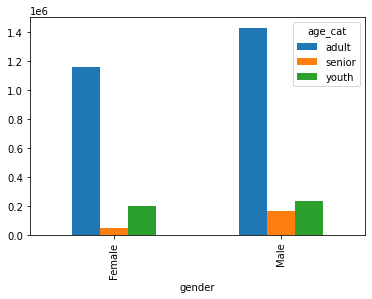

In [42]:
aq.plot(kind = 'bar' )



In [43]:
bq =pd.pivot_table(group_nfraud,values = 'claim_amount',index='gender',columns = 'age_cat')
bq

age_cat,adult,senior,youth
gender,,,
Female,1.156984e+06,43493.0,194678.494077
Male,1.429173e+06,161908.5,231055.497038


<AxesSubplot:xlabel='gender'>

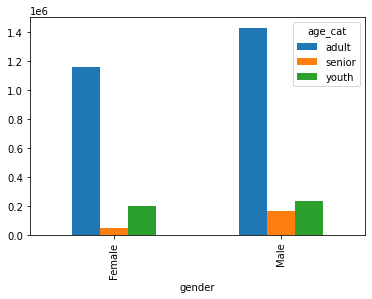

In [44]:
bq.plot(kind = 'bar' )

#### Is there any similarity in the amount claimed by males and females?

In [45]:
cust_claim.gender.unique()

array(['Female', 'Male'], dtype=object)

In [46]:
s1 = cust_claim.loc[cust_claim.gender=='Male','claim_amount']
s2 = cust_claim.loc[cust_claim.gender=='Female','claim_amount']
print('mean of male-', s1.mean())
print('mean of female-', s2.mean())

mean of male- 12821.542393727847
mean of female- 12105.597649726496


In [47]:
# Ho : u1 = u2
# Ha : u1 <> u2

# CI: 95%
# p: 0.05
# perform the test
stats.ttest_ind(s1,s2)


Ttest_indResult(statistic=0.8848199716864555, pvalue=0.37645013430168395)

In [48]:
#business conclusion
#with the given data we can say there is similarity between amount claim by male and female

#### Is there any relationship between age category and segment?

In [49]:
# data preparation for chi-square test
obs_freq=pd.crosstab(cust_claim.Segment,cust_claim.age_cat)
# Ho = no relationship
# Ha = there is a relationship among the variables
# CI = 95%
# p-value = 0.05
# perform the test
print('pvalue=', stats.chi2_contingency(obs_freq)[1])


pvalue= 0.618441008332876


In [50]:
#business conclusion
#we can not ignore null hypothesis so there is no relation between age category and segment

#### The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was 10,000.

In [51]:
s3 = cust_claim.claim_amount
print('mean of claim amount-', s3.mean())

mean of claim amount- 12470.498519249748


In [52]:
# Ho : u1 <=10000
# Ha : u1 > 10000

# CI: 95%
# p: 0.05
# perform the test
stats.ttest_1samp( cust_claim.claim_amount,10000)


Ttest_1sampResult(statistic=6.108222642303586, pvalue=1.4021917187052693e-09)

In [53]:
#business conclusion 
# hence we can say we can ignore null and in current year claim amount is increased as compared to previous one

#### is there any difference between age groups and insurance claims?

In [54]:
s5 = cust_claim.loc[cust_claim.age_cat=='youth', 'claim_amount']
s6 = cust_claim.loc[cust_claim.age_cat=='adult', 'claim_amount']
s7 = cust_claim.loc[cust_claim.age_cat=='senior', 'claim_amount']
print('mean of youth claim amount-', s5.mean())
print('mean of adult claim amount-', s6.mean())
print('mean of senior amount-', s7.mean())



mean of youth claim amount- 12095.69718325446
mean of adult claim amount- 12415.121694390456
mean of senior amount- 13942.046356665669


In [55]:
# Ho : samples are from same population
# Ha : samples are from different population

# CI: 95%
# p: 0.05
# perform the test
stats.f_oneway(s5,s6,s7)

F_onewayResult(statistic=0.6191408320478986, pvalue=0.5385974581156312)

In [56]:
#business conclusion 
#hence they are related to each other

### Is there any relationship between total number of policy claims and the claimed amount?

In [57]:
cust_claim.total_policy_claims.unique()

array([1., 3., 4., 2., 5., 7., 6., 8.])

In [58]:
s8= cust_claim.loc[cust_claim.total_policy_claims==1.0, 'claim_amount']
s9= cust_claim.loc[cust_claim.total_policy_claims==2.0, 'claim_amount']
s10= cust_claim.loc[cust_claim.total_policy_claims==3.0, 'claim_amount']
s11= cust_claim.loc[cust_claim.total_policy_claims==4.0, 'claim_amount']
s12= cust_claim.loc[cust_claim.total_policy_claims==5.0, 'claim_amount']
s13= cust_claim.loc[cust_claim.total_policy_claims==6.0, 'claim_amount']
s14= cust_claim.loc[cust_claim.total_policy_claims==7.0, 'claim_amount']
s15= cust_claim.loc[cust_claim.total_policy_claims==8.0, 'claim_amount']

print('mean of 1.0 claim amount-', s8.mean())
print('mean of 2.0 claim amount-', s9.mean())
print('mean of 3.0 claim amount-', s10.mean())
print('mean of 4.0 claim amount-', s11.mean())
print('mean of 5.0 claim amount-', s12.mean())
print('mean of 6.0 claim amount-', s13.mean())
print('mean of 7.0 claim amount-', s14.mean())
print('mean of 8.0 claim amount-', s15.mean())


mean of 1.0 claim amount- 12423.615182452684
mean of 2.0 claim amount- 13876.45186612499
mean of 3.0 claim amount- 12928.191757156957
mean of 4.0 claim amount- 11049.72408687068
mean of 5.0 claim amount- 8530.462853277759
mean of 6.0 claim amount- 15657.833168805528
mean of 7.0 claim amount- 23033.0
mean of 8.0 claim amount- 3277.5


In [59]:
# Ho : samples are from same population
# Ha : samples are from different population

# CI: 95%
# p: 0.05
# perform the test
stats.f_oneway(s8,s9,s10,s11,s12,s13,s14,s15)

F_onewayResult(statistic=0.933785161183679, pvalue=0.47919181486678586)

In [ ]:
#business conclusion
#We can conclude that there is no difference between the mean claim_amount of total_policy_claims